In [1]:
import tensorflow as tf

## Loading MNIST Dataset from Keras TensorFlow

In [2]:
mnist = tf.keras.datasets.mnist

## Dividing the dataset into training and testing

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

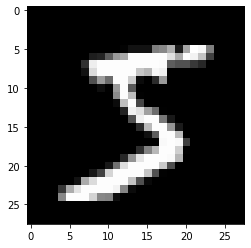

In [6]:
plt.imshow(x_train[0],cmap='gray')

In [7]:
x_train[0].shape

(28, 28)

## Normalizing the pixel values in each image

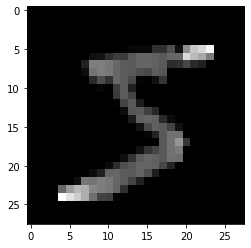

In [8]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap='gray')

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Reshaping the training and test dataset as single channel (Grayscale)

In [10]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [11]:
x_train.shape

(60000, 28, 28, 1)

In [12]:
x_train.shape[1:]

(28, 28, 1)

In [13]:
x_test.shape

(10000, 28, 28, 1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Conv2D,MaxPooling2D,Flatten

## Building the MODEL 

In [15]:
model = Sequential()

#1st convolutional layer
model.add(Conv2D(64,(3,3),input_shape=(28,28,1)))       #output = (28 - 3) + 1 = 26 i.e (26,26,64)
 
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))                #output = 26/2=13 i.e (13,13,64)

#2nd convolutional layer   
model.add(Conv2D(64,(3,3)))                             #output = (13 - 3) + 1 = 11 i.e (11,11,64)

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))                #output = (11/2(floor)) i.e (5,5,64)


#3rd convolutional layer
model.add(Conv2D(64,(3,3)))                             #output = (5 - 3) + 1 = 3 i.e (3,3,64)

model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))                #output = (3/2(floor)) i.e (1,1,64)


model.add(Flatten())

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

## Summary of the MODEL

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [17]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [18]:
history=model.fit(x_train,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.3488 - accuracy: 0.8927 - val_loss: 0.1416 - val_accuracy: 0.9560
Epoch 2/5
1313/1313 [==============================] - 28s 22ms/step - loss: 0.1155 - accuracy: 0.9642 - val_loss: 0.1018 - val_accuracy: 0.9686
Epoch 3/5
1313/1313 [==============================] - 28s 22ms/step - loss: 0.0810 - accuracy: 0.9754 - val_loss: 0.0982 - val_accuracy: 0.9701
Epoch 4/5
1313/1313 [==============================] - 28s 22ms/step - loss: 0.0637 - accuracy: 0.9801 - val_loss: 0.0689 - val_accuracy: 0.9786
Epoch 5/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0494 - accuracy: 0.9847 - val_loss: 0.0731 - val_accuracy: 0.9790


## MODEL ACCURACY

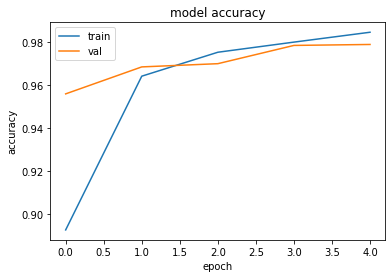

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## MODEL LOSS

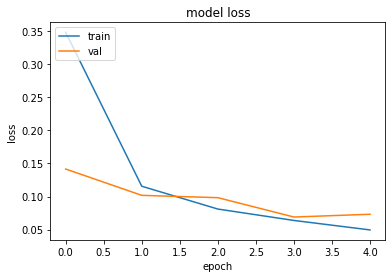

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## TEST DATASET ACCURACY OF THE MODEL

In [23]:
test_loss,test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0654 - accuracy: 0.9811


In [24]:
predictions=model.predict(x_test)
print(predictions)

[[4.7511911e-08 7.2825554e-07 5.9426753e-07 ... 9.9999642e-01
  7.7311162e-09 1.8060803e-06]
 [2.2615162e-03 1.0392170e-05 9.9767274e-01 ... 6.7836913e-07
  4.4274198e-05 3.6799637e-08]
 [3.9980491e-06 9.9998724e-01 4.1486750e-08 ... 1.7657546e-06
  4.2426048e-08 8.0591957e-07]
 ...
 [9.9911767e-07 2.2767119e-06 1.0308674e-08 ... 5.1717893e-07
  2.9259638e-06 1.6050040e-05]
 [4.0782840e-04 8.2068970e-11 7.3085077e-10 ... 4.7288697e-11
  1.7350673e-06 1.2978508e-04]
 [2.0519623e-05 2.6737082e-10 1.8411836e-07 ... 2.3488780e-11
  5.5584328e-06 2.3350899e-06]]


In [26]:
import numpy as np

## Checking whether the predictions are correct or not

## Randomly checked 2 predictions and were found correct

## 1.

In [27]:
print(np.argmax(predictions[0]))

7


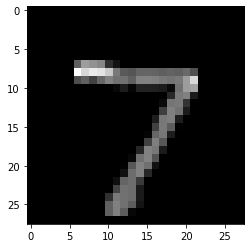

In [28]:
plt.imshow(x_test[0],cmap='gray')

## 2.

In [31]:
print(np.argmax(predictions[55]))

0


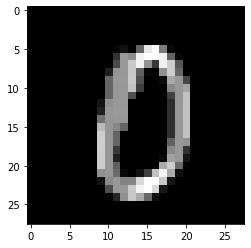

In [33]:
plt.imshow(x_test[55],cmap='gray')

## Checking by giving own custom digit input

In [34]:
import cv2

In [35]:
img = cv2.imread('eight.png')

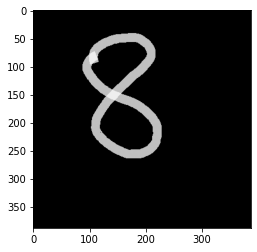

In [36]:
plt.imshow(img)

In [37]:
img.shape

(388, 388, 3)

In [38]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [39]:
resized_img = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

In [40]:
resized_img.shape

(28, 28)

In [41]:
norm_img = tf.keras.utils.normalize(resized_img,axis=1)

In [42]:
fin_img = norm_img.reshape(-1,28,28,1)

In [43]:
fin_img.shape

(1, 28, 28, 1)

In [44]:
prediction = model.predict(fin_img)

## The Model correctly identifies handwritten digit as '8'

In [45]:
print(np.argmax(prediction))

8
